# The first commit titanic from aijobcalle completed
**Referenced Kanel is [Titanic Data Science EDA with meme+Solution](https://www.kaggle.com/soham1024/titanic-data-science-eda-with-meme-solution)**


## Import packages

In [2]:
import pandas as pd
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV


## Read train and test data

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print(train.shape)
print(test.shape)

all = pd.concat([train, test])

(891, 12)
(418, 11)


In [4]:
train.info()
print('-'*50)
test.info()
print('-'*50)
all.info()

display(train['Ticket'].apply(lambda x: x[0:3]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

0      A/5
1      PC 
2      STO
3      113
4      373
      ... 
886    211
887    112
888    W./
889    111
890    370
Name: Ticket, Length: 891, dtype: object

## Feature engineering

In [274]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [275]:
train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [276]:
all_droped = all.drop(['Ticket', 'Cabin'], axis=1)

In [277]:
all_droped['Title'] = all_droped.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [278]:
pd.crosstab(all_droped['Title'], all_droped['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [279]:
all_droped['Title'] = all_droped['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
all_droped['Title'] = all_droped['Title'].replace('Mlle', 'Miss')
all_droped['Title'] = all_droped['Title'].replace('Ms', 'Miss')
all_droped['Title'] = all_droped['Title'].replace('Mme', 'Mrs')
    
all_droped[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [280]:
title_mapping = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5
}
all_droped['Title'] = all_droped['Title'].map(title_mapping)
all_droped['Title'] = all_droped['Title'].fillna(0)

In [281]:
passenger_id = all_droped['PassengerId']
all_droped_2 = all_droped.drop(['Name', 'PassengerId'], axis=1)
all_droped_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,1
1,1.0,1,female,38.0,1,0,71.2833,C,3
2,1.0,3,female,26.0,0,0,7.9250,S,2
3,1.0,1,female,35.0,1,0,53.1000,S,3
4,0.0,3,male,35.0,0,0,8.0500,S,1


In [282]:
sex_mapping = {
    'male': 0,
    'female': 1
}

print(all_droped_2['Sex'].head())
print(all_droped_2['Sex'].value_counts())
all_droped_2['Sex'] = all_droped_2['Sex'].map(sex_mapping).astype(int)

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
male      843
female    466
Name: Sex, dtype: int64


In [283]:
all_droped_2.info()
all_droped_2['Sex'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
 8   Title     1309 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 102.3+ KB


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [284]:
all_droped_2.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
Title         0
dtype: int64

In [285]:
all_droped_2['Age'] = all_droped_2['Age'].fillna(all_droped_2['Age'].mean())

In [286]:
all_droped_2.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      2
Title         0
dtype: int64

In [287]:
all_droped_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,7.2500,S,1
1,1.0,1,1,38.0,1,0,71.2833,C,3
2,1.0,3,1,26.0,0,0,7.9250,S,2
3,1.0,1,1,35.0,1,0,53.1000,S,3
4,0.0,3,0,35.0,0,0,8.0500,S,1


In [288]:
all_droped_2['FamilySize'] = all_droped_2['SibSp'] + all_droped_2['Parch'] + 1

In [289]:
print(all_droped_2[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [290]:
all_droped_2['IsAlone'] = 0
all_droped_2.loc[all_droped_2['FamilySize'] == 1, 'IsAlone'] = 1

In [291]:
all_droped_3 = all_droped_2.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
all_droped_3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22.0,7.2500,S,1,0
1,1.0,1,1,38.0,71.2833,C,3,0
2,1.0,3,1,26.0,7.9250,S,2,1
3,1.0,1,1,35.0,53.1000,S,3,0
4,0.0,3,0,35.0,8.0500,S,1,1


In [292]:
embarked_mode = all_droped_3['Embarked'].mode()[0]

In [293]:
all_droped_3['Embarked'] = all_droped_3['Embarked'].fillna(embarked_mode)

In [294]:
embarked_mapping = {
    'S': 0,
    'C': 1,
    'Q': 2
}

all_droped_3['Embarked'] = all_droped_3['Embarked'].map(embarked_mapping).astype(int)

In [295]:
all_droped_3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22.0,7.2500,0,1,0
1,1.0,1,1,38.0,71.2833,1,3,0
2,1.0,3,1,26.0,7.9250,0,2,1
3,1.0,1,1,35.0,53.1000,0,3,0
4,0.0,3,0,35.0,8.0500,0,1,1


In [296]:
all_droped_3.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
Fare          1
Embarked      0
Title         0
IsAlone       0
dtype: int64

In [297]:
all_droped_3['Fare'] = all_droped_3['Fare'].fillna(all_droped_3['Fare'].dropna().median())

In [298]:
# cut fare to 3 bins
all_droped_3['FareBand'] = pd.qcut(all_droped_3['Fare'], 3)
bands = all_droped_3[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [299]:
fare_bands = bands['FareBand']

In [300]:
fare_bands[0].left

-0.001

In [301]:
for idx, fb in enumerate(fare_bands):
    mask = (float(fb.left) <= all_droped_3['Fare']) & (float(fb.right) > all_droped_3['Fare'])
    all_droped_3.loc[mask, 'Fare'] = float(idx)

In [302]:
all_droped_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    float64 
 1   Pclass    1309 non-null   int64   
 2   Sex       1309 non-null   int64   
 3   Age       1309 non-null   float64 
 4   Fare      1309 non-null   float64 
 5   Embarked  1309 non-null   int64   
 6   Title     1309 non-null   int64   
 7   IsAlone   1309 non-null   int64   
 8   FareBand  1309 non-null   category
dtypes: category(1), float64(3), int64(5)
memory usage: 93.4 KB


In [303]:
all_droped_4 = all_droped_3.drop('FareBand', axis=1)

In [304]:
all_droped_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   Fare      1309 non-null   float64
 5   Embarked  1309 non-null   int64  
 6   Title     1309 non-null   int64  
 7   IsAlone   1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 92.0 KB


In [305]:
all_droped_4.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22.0,0.0,0,1,0
1,1.0,1,1,38.0,2.0,1,3,0
2,1.0,3,1,26.0,0.0,0,2,1
3,1.0,1,1,35.0,2.0,0,3,0
4,0.0,3,0,35.0,0.0,0,1,1


In [306]:
train_feature_maked = all_droped_4[:train.shape[0]]
test_feature_maked = all_droped_4[train.shape[0]:]

In [307]:
print(train_feature_maked.shape)
print(test_feature_maked.shape)

(891, 8)
(418, 8)


In [308]:
test_feature_maked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  0 non-null      float64
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   Fare      418 non-null    float64
 5   Embarked  418 non-null    int64  
 6   Title     418 non-null    int64  
 7   IsAlone   418 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 29.4 KB


In [309]:
X = train_feature_maked.drop('Survived', axis=1)
y = train_feature_maked['Survived']

## Split train and eval data

In [310]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_eval.shape)
print(y_train.shape)
print(y_eval.shape)

(623, 7)
(268, 7)
(623,)
(268,)


## Create model pipelines

In [311]:
def create_pca_pipelines(n_components):
    return {
        'rf': Pipeline([
                ('scaler', StandardScaler()),
                ('features', PCA(n_components=n_components, random_state=0)),
                ('model', RandomForestClassifier(random_state=0))
            ]),
        'gb': Pipeline([
                ('scaler', StandardScaler()),
                ('features', PCA(n_components=n_components, random_state=0)),
                ('model', GradientBoostingClassifier(random_state=0))
            ])
    }

In [312]:
def eval_pca_pipelines():
    n_components_list = list(range(1, X_train.shape[1]))
    
    scores = {
        'rf': [],
        'gb': []
    }
    for i in n_components_list:
        pipelines = create_pca_pipelines(i)
        for pipe_name, pipeline in pipelines.items():      
            pipeline.fit(X_train, y_train)
            y_eval_pred = pipeline.predict(X_eval)
            score = pipeline.score(X_eval, y_eval)
            auc = roc_auc_score(y_eval, y_eval_pred)
            f1 = f1_score(y_eval, y_eval_pred)
            #print(f'model : {pipe_name}')
            #print(f'score : {score}')
            #print(f'auc : {auc}')
            #print(f'f1 : {f1}')
            #scores.append(score)
            #aucs.append(auc)
            #f1s.append(f1)
            scores[pipe_name].append(auc)
    return scores

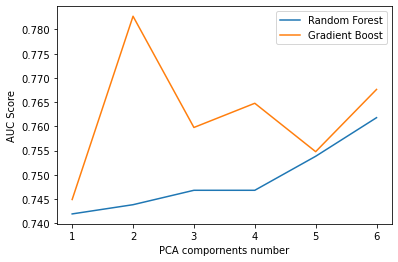

In [313]:
scores = eval_pca_pipelines()
plt.xlabel('PCA compornents number')
plt.ylabel('AUC Score')
plt.plot(n_components_list, scores['rf'], label='Random Forest')
plt.plot(n_components_list, scores['gb'], label='Gradient Boost')
plt.legend()

In [314]:
def create_rfecv_pipelines():
    return {
        'rf': Pipeline([
                ('scaler', StandardScaler()),
                ('features', RFECV(estimator=RandomForestClassifier(random_state=0), cv=5, scoring='f1')),
                ('model', RandomForestClassifier(random_state=0))
            ]),
        'gb': Pipeline([
                ('scaler', StandardScaler()),
                ('features', RFECV(estimator=RandomForestClassifier(random_state=0), cv=5, scoring='f1')),
                ('model', GradientBoostingClassifier(random_state=0))
            ])
    }

In [315]:
def eval_rfecv_pipelines():
    pipelines = create_rfecv_pipelines()
    scores = {
        'rf': [],
        'gb': []
    }
    for pipe_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_eval_pred = pipeline.predict(X_eval)
        score = pipeline.score(X_eval, y_eval)
        auc = roc_auc_score(y_eval, y_eval_pred)
        f1 = f1_score(y_eval, y_eval_pred) 
        scores[pipe_name].append(auc)
    
    return scores

In [316]:
rfecv_scores = eval_rfecv_pipelines()

In [317]:
print(rfecv_scores)

{'rf': [0.7835714285714286], 'gb': [0.8034523809523809]}


## Prediction test csv

In [318]:
model = create_rfecv_pipelines()['gb']
model.fit(X, y)
#model.predict_proba(test_feature_maked)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 RFECV(cv=5, estimator=RandomForestClassifier(random_state=0),
                       scoring='f1')),
                ('model', GradientBoostingClassifier(random_state=0))])

In [319]:
X_test = test_feature_maked.drop(['Survived'], axis=1)

In [320]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone'], dtype='object')

In [321]:
model.predict_proba(X_test)

array([[0.92152521, 0.07847479],
       [0.81722448, 0.18277552],
       [0.51108071, 0.48891929],
       [0.80629202, 0.19370798],
       [0.38610156, 0.61389844],
       [0.90733263, 0.09266737],
       [0.37040281, 0.62959719],
       [0.76056203, 0.23943797],
       [0.24737794, 0.75262206],
       [0.90754896, 0.09245104],
       [0.89927232, 0.10072768],
       [0.80182848, 0.19817152],
       [0.03798513, 0.96201487],
       [0.70366452, 0.29633548],
       [0.07677352, 0.92322648],
       [0.07383174, 0.92616826],
       [0.92152521, 0.07847479],
       [0.89708139, 0.10291861],
       [0.29612036, 0.70387964],
       [0.7959737 , 0.2040263 ],
       [0.84977914, 0.15022086],
       [0.38760093, 0.61239907],
       [0.04648512, 0.95351488],
       [0.72329243, 0.27670757],
       [0.01774097, 0.98225903],
       [0.95069503, 0.04930497],
       [0.05023139, 0.94976861],
       [0.89708139, 0.10291861],
       [0.5343317 , 0.4656683 ],
       [0.89927232, 0.10072768],
       [0.

In [326]:
y_test = model.predict(X_test)

## Save result to csv

In [340]:
test_passenger_id = passenger_id[train.shape[0]:]
test_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
test_df['PassengerId'] = test_passenger_id
test_df['Survived'] = Series(y_test, dtype=int)

In [341]:
test_df['Survived']

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [342]:
test_df.to_csv('./data/predict.csv', index=False)